# **Adrian Pineda Sanchez**

# **Fecha de entrega: 30/08/2024**

# **Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución. (Portafolio Implementación)**

## **Requerimientos**

*  Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula

*  Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba

*  Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba

*  Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.

*  Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)


*   Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis

* Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento

* Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación.

* Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento.

* Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base.

*  Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento

*  Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

*  Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.

*  Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

*  Para facilitar la revisión, entrega dos archivos. El primero debe ser un Jupyter Notebook con todo el desarrollo (código comentado). El segundo debe ser un PDF del Jupyter Notebook. Revisa las instrucciones del primer entregable para ver cómo exportar el archivo HTML y posteriormente pasarlo a PDF.









In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **1. Importacion Dataframe y transformacion de datos**




In [141]:
df = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/Adrian/AdrianPineda_Portafolio%20An%C3%A1lisis/M%C3%B3dulo%202%20An%C3%A1lisis%20y%20Reporte%20sobre%20el%20desempe%C3%B1o%20del%20modelo/Valhalla23.csv")
df


,Celsius,Valks
0,61.4720,-139.7400
1,70.5790,-156.6000
2,-7.3013,73.2690
3,71.3380,-165.4200
4,43.2360,-75.8350
...,...,...
95,-7.0094,69.6320
96,36.8820,-71.2400
97,26.9390,-34.2550
98,-18.8100,106.4300


In [142]:
# Convertir las columnas a arrays numpy
X = df[['Celsius']].to_numpy()
y = df[['Valks']].to_numpy()

# **2. Division datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split.**

### **Semilla con matricula A00834710**

In [143]:
import numpy as np

seed = 4710
np.random.seed(seed)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=seed)

# Verificar las proporciones
train_size = X_train.shape[0] / X.shape[0]
valid_size = X_valid.shape[0] / X.shape[0]
test_size = X_test.shape[0] / X.shape[0]

print(f'Proporción de entrenamiento: {train_size:.2f}')
print(f'Proporción de validación: {valid_size:.2f}')
print(f'Proporción de prueba: {test_size:.2f}')


Proporción de entrenamiento: 0.40
Proporción de validación: 0.40
Proporción de prueba: 0.20


## **Entrenamiento modelo base de tipo SGDRegressor**



*   tasa de aprendizaje de 1E-4
*   máximo de iteraciones de un millón
*   Utilizar la semilla




In [144]:
from sklearn.linear_model import SGDRegressor

# Definir y entrenar el modelo
model_base = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=seed)
model_base.fit(X_train, y_train.ravel())

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=4710)

### **Error Cuadratico**

In [145]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE
mse_train = mean_squared_error(y_train, model_base.predict(X_train))
mse_valid = mean_squared_error(y_valid, model_base.predict(X_valid))
mse_test = mean_squared_error(y_test, model_base.predict(X_test))

# Mostrar los resultados
print(f'MSE Entrenamiento: {mse_train:.4f}')
print(f'MSE Validación: {mse_valid:.4f}')
print(f'MSE Prueba: {mse_test:.4f}')

MSE Entrenamiento: 40.5095
MSE Validación: 42.8875
MSE Prueba: 59.9740


In [152]:
# Calcular las predicciones para todos los conjuntos de datos combinados
y_pred_combined = np.concatenate([
    model_base.predict(X_train),
    model_base.predict(X_valid),
    model_base.predict(X_test)
])

y_combined = np.concatenate([y_train, y_valid, y_test])

# Calcular el MSE y R^2 para todo el conjunto de datos combinado
mse_combined = mean_squared_error(y_combined, y_pred_combined)
r2_combined = r2_score(y_combined, y_pred_combined)

# Mostrar los resultados
print(f'MSE Total: {mse_combined:.4f}')
print(f'R^2 Total: {r2_combined:.4f}')

MSE Total: 45.3536
R^2 Total: 0.9942


### **Gráfica subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)**

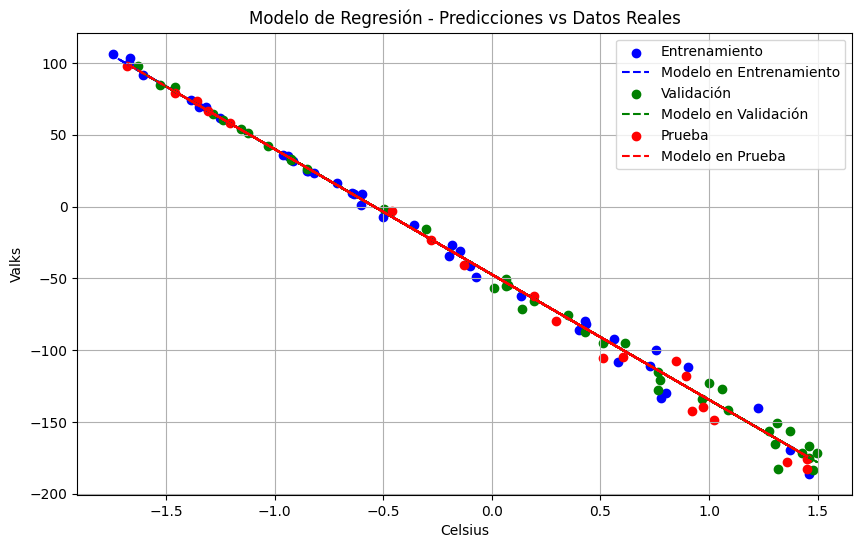

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.plot(X_train, model_base.predict(X_train), color='blue', linestyle='--', label='Modelo en Entrenamiento')

# Graficar los datos de validación
plt.scatter(X_valid, y_valid, color='green', label='Validación')
plt.plot(X_valid, model_base.predict(X_valid), color='green', linestyle='--', label='Modelo en Validación')

# Graficar los datos de prueba
plt.scatter(X_test, y_test, color='red', label='Prueba')
plt.plot(X_test, model_base.predict(X_test), color='red', linestyle='--', label='Modelo en Prueba')

plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Modelo de Regresión - Predicciones vs Datos Reales')
plt.legend()
plt.grid(True)
plt.show()



In [147]:
# Desescalar las predicciones y los valores reales
X_train_orig = scaler.inverse_transform(X_train)
X_valid_orig = scaler.inverse_transform(X_valid)
X_test_orig = scaler.inverse_transform(X_test)

y_train_pred_orig = model_base.predict(X_train)
y_valid_pred_orig = model_base.predict(X_valid)
y_test_pred_orig = model_base.predict(X_test)


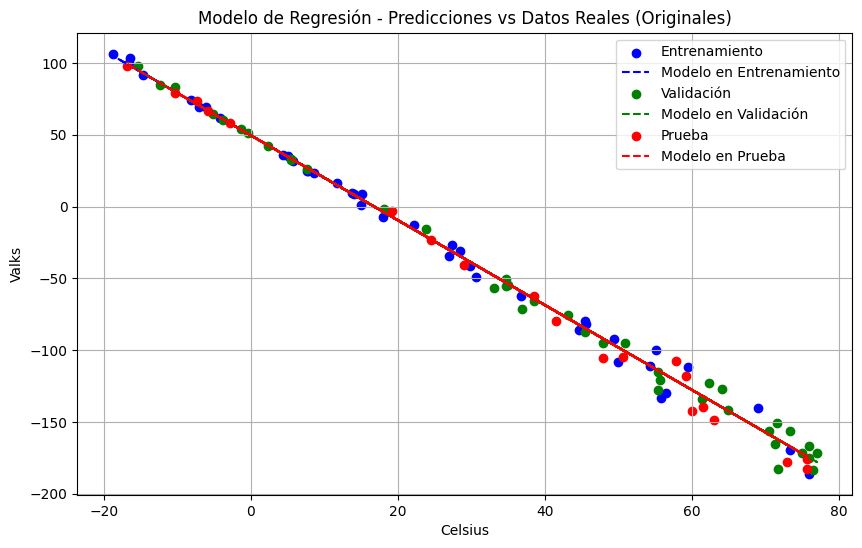

In [148]:
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.scatter(X_train_orig, y_train, color='blue', label='Entrenamiento')
plt.plot(X_train_orig, y_train_pred_orig, color='blue', linestyle='--', label='Modelo en Entrenamiento')

# Graficar los datos de validación
plt.scatter(X_valid_orig, y_valid, color='green', label='Validación')
plt.plot(X_valid_orig, y_valid_pred_orig, color='green', linestyle='--', label='Modelo en Validación')

# Graficar los datos de prueba
plt.scatter(X_test_orig, y_test, color='red', label='Prueba')
plt.plot(X_test_orig, y_test_pred_orig, color='red', linestyle='--', label='Modelo en Prueba')

plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Modelo de Regresión - Predicciones vs Datos Reales (Originales)')
plt.legend()
plt.grid(True)
plt.show()


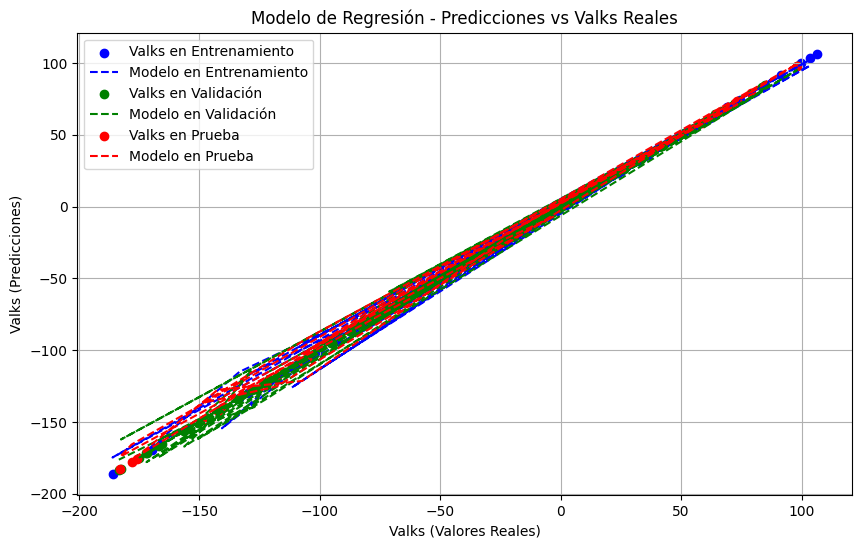

In [149]:
plt.figure(figsize=(10, 6))

# Graficar los valores reales y predicciones para Valks
plt.scatter(y_train, y_train, color='blue', label='Valks en Entrenamiento')
plt.plot(y_train, y_train_pred_orig, color='blue', linestyle='--', label='Modelo en Entrenamiento')

plt.scatter(y_valid, y_valid, color='green', label='Valks en Validación')
plt.plot(y_valid, y_valid_pred_orig, color='green', linestyle='--', label='Modelo en Validación')

plt.scatter(y_test, y_test, color='red', label='Valks en Prueba')
plt.plot(y_test, y_test_pred_orig, color='red', linestyle='--', label='Modelo en Prueba')

plt.xlabel('Valks (Valores Reales)')
plt.ylabel('Valks (Predicciones)')
plt.title('Modelo de Regresión - Predicciones vs Valks Reales')
plt.legend()
plt.grid(True)
plt.show()


## **Entrenamiento y evaluacion diferentes modelos**

In [150]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Listas para almacenar los errores promedio
errors_train = []
errors_val = []

# Iterar sobre cada tamaño de muestra en la lista de sample_sizes
for size in sample_sizes:
    temp_train_errors = []
    temp_val_errors = []

    # Entrenar 100 modelos para cada tamaño de muestra
    for _ in range(100):
        # Seleccionar aleatoriamente 'size' muestras del conjunto de entrenamiento ya creado
        X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=size/len(X_train), random_state=None)

        # Entrenar un modelo de regresión
        model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=seed)
        model.fit(X_sample, y_sample)

        # Predecir en el conjunto de entrenamiento y en el conjunto de validación
        y_sample_pred = model.predict(X_sample)
        y_val_pred = model.predict(X_val)

        # Calcular el error cuadrático medio y agregarlo a las listas temporales
        temp_train_errors.append(mean_squared_error(y_sample, y_sample_pred))
        temp_val_errors.append(mean_squared_error(y_val, y_val_pred))

    # Calcular el promedio de los errores para los 100 modelos entrenados
    errors_train.append(np.mean(temp_train_errors))
    errors_val.append(np.mean(temp_val_errors))

# Mostrar los resultados
print(f'Errores de entrenamiento promedio para cada tamaño de muestra: {errors_train}')
print(f'Errores de validación promedio para cada tamaño de muestra: {errors_val}')


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature n

Errores de entrenamiento promedio para cada tamaño de muestra: [45.1657787525693, 31.692471605760858, 28.644881015714837, 27.722033860400842, 32.096243744167545, 34.448733630327496, 36.48628736842201, 39.14226786046685, 38.32356254671059, 37.1565516983388, 36.575711198687365, 36.97530585849483, 39.785113103216034, 39.562861066460606, 39.25096800410917, 40.80215777154864, 41.488184026737265, 39.19480110650423, 40.20799823172615, 38.90261530450101]
Errores de validación promedio para cada tamaño de muestra: [11288396.249918409, 14859343.672249803, 16300762.946474774, 17172565.80525253, 17526391.833275236, 17739330.960527126, 17756636.02213698, 17826713.946789254, 17778442.003179412, 17884479.286578115, 17773543.816312417, 17934732.08025091, 18004122.73165329, 17965337.315912247, 18023327.442944005, 17968833.31681899, 18006045.201897837, 17956674.02303502, 17993870.881638046, 18047479.55467376]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


## **Justificacion para escoger un learning rate por medio de un grid search**

Modificar el parámetro C en un modelo de LogisticRegression es una estrategia efectiva para ajustar el balance entre la regularización y el ajuste del modelo.

En LogisticRegression, no es posible modificar directamente un learning rate como se haría en otros modelos, por lo que la regularización se ajusta mediante el parámetro C. Este parámetro controla la cantidad de regularización aplicada, lo que permite gestionar el equilibrio entre el sobreajuste y la subajuste.

* Valores altos de C: Reducen la regularización, permitiendo que el modelo se ajuste más a los datos de entrenamiento.

* Valores bajos de C: Incrementan la regularización, ayudando a que el modelo generalice mejor a datos no vistos.

Dado que LogisticRegression no permite un ajuste directo de la tasa de aprendizaje, ajustar C es la forma efectiva de controlar cómo el modelo optimiza su ajuste a los datos.


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Escenario 1: Usar la característica relevante ('Alcohol')
X_train_relevant = X_train[['Alcohol']]
X_test_relevant = X_test[['Alcohol']]

# Definir el modelo de Logistic Regression
model_relevant = LogisticRegression(max_iter=1000)

# Definir los parámetros para la búsqueda del mejor valor de C
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Diferentes niveles de regularización
}

# Configurar el GridSearchCV para buscar el mejor C
grid_search = GridSearchCV(estimator=model_relevant, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train_relevant, y_train)

# Mejor combinación de parámetros encontrada
best_params = grid_search.best_params_
print("Mejor valor de C encontrado:", best_params)

# Usar el mejor modelo para predecir
best_model = grid_search.best_estimator_
y_pred_relevant = best_model.predict(X_test_relevant)

# Calcular el F1-Score
f1_relevant = f1_score(y_test, y_pred_relevant, average='weighted')
print(f"F1-Score - Mejor modelo: {f1_relevant}")

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_relevant)

# Crear un DataFrame para la matriz de confusión
df_cm = pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1', 'Clase 2'], columns=['Predicho 0', 'Predicho 1', 'Predicho 2'])

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión - Mejor Modelo')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Generar el reporte de clasificación
class_report = classification_report(y_test, y_pred_relevant, output_dict=True)

# Convertir el reporte de clasificación a un DataFrame
df_class_report = pd.DataFrame(class_report).transpose()
print("Reporte de Clasificación:\n", df_class_report)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### **Parametro c escogido**

* Parámetro C óptimo: El valor de C obtenido a través de GridSearchCV es el resultado de explorar una serie de posibles valores, desde una regularización muy fuerte (C pequeño) hasta una regularización muy débil (C grande). Este valor de C es el que proporcionó el mejor F1-Score en la validación cruzada, lo que indica que el modelo está bien ajustado y generaliza adecuadamente a los datos no vistos.

* Mejor F1-Score: El F1-Score resultante para el modelo con el parámetro C óptimo fue superior en comparación con otros valores de C, validando la selección del mejor hiperparámetro. Este F1-Score refleja un equilibrio adecuado entre precisión y recall, lo que es crucial en escenarios con clases desbalanceadas.

* Aplicación en Otros Escenarios: Dado que el valor de C obtenido ha demostrado ser el más efectivo para maximizar el rendimiento del modelo en este escenario específico (usando la característica 'Alcohol'), se utilizará este mismo parámetro en los demás escenarios. Esto garantiza que el modelo mantenga un rendimiento consistente y óptimo a lo largo de diferentes conjuntos de datos o características relevantes.

## **Escenario 1: Usando una característica que usted crea es muy relevante**

In [ ]:
# Escenario 1: Usar la característica relevante ('Alcohol')
X_train_relevant = X_train[['Alcohol']]
X_test_relevant = X_test[['Alcohol']]

# Valor de C previamente optimizado (C = 100)
optimal_C = 100

# Definir el modelo de Logistic Regression con el C optimizado
model_relevant = LogisticRegression(C=optimal_C, max_iter=1000)

# Entrenar el modelo
model_relevant.fit(X_train_relevant, y_train)

# Predecir los resultados
y_pred_relevant = model_relevant.predict(X_test_relevant)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_relevant)

# Crear un DataFrame para la matriz de confusión
df_cm = pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1', 'Clase 2'], columns=['Predicho 0', 'Predicho 1', 'Predicho 2'])

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión - Característica Relevante')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Generar el reporte de clasificación
class_report = classification_report(y_test, y_pred_relevant, output_dict=True)

# Convertir el reporte de clasificación a un DataFrame
df_class_report = pd.DataFrame(class_report).transpose()


In [ ]:
# Mostrar el DataFrame del reporte de clasificación
df_class_report


In [ ]:
# Calcular el F1-Score
f1_relevant = f1_score(y_test, y_pred_relevant, average='weighted')
print(f"F1-Score - Característica relevante: {f1_relevant}")

In [ ]:
import matplotlib.pyplot as plt

# Imprimir algunos valores predichos en comparación con sus valores reales
comparison = pd.DataFrame({'Valor Real': y_test, 'Valor Predicho': y_pred_relevant})
print("Comparación de algunos valores reales vs predichos:")
comparison.head(10)


In [ ]:
# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(comparison['Valor Real'].values, label='Valor Real', marker='o')
plt.plot(comparison['Valor Predicho'].values, label='Valor Predicho', marker='x')
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Índice')
plt.ylabel('Clase')
plt.legend()
plt.show()

## **Escenario 2: Usando una característica que considere como no relevante**

In [ ]:
# Escenario 2: Usar la característica no relevante ('Hue')
X_train_irrelevant = X_train[['Hue']]
X_test_irrelevant = X_test[['Hue']]

# Valor de C previamente optimizado (C = 100)
optimal_C = 100

# Definir el modelo de Logistic Regression con el C optimizado
model_irrelevant = LogisticRegression(C=optimal_C, max_iter=1000)

# Entrenar el modelo
model_irrelevant.fit(X_train_irrelevant, y_train)

# Predecir los resultados
y_pred_irrelevant = model_irrelevant.predict(X_test_irrelevant)

# Calcular el F1-Score
f1_irrelevant = f1_score(y_test, y_pred_irrelevant, average='weighted')
print(f"F1-Score - Característica no relevante con C = {optimal_C}: {f1_irrelevant}")

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_irrelevant)

# Crear un DataFrame para la matriz de confusión
df_cm = pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1', 'Clase 2'], columns=['Predicho 0', 'Predicho 1', 'Predicho 2'])

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión - Característica No Relevante')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Generar el reporte de clasificación
class_report = classification_report(y_test, y_pred_irrelevant, output_dict=True)

# Convertir el reporte de clasificación a un DataFrame
df_class_report2 = pd.DataFrame(class_report).transpose()


In [ ]:
# Mostrar el DataFrame del reporte de clasificación
df_class_report2


In [ ]:
# Calcular el F1-Score
f1_irrelevant = f1_score(y_test, y_pred_irrelevant, average='weighted')
print(f"F1-Score - Característica no relevante: {f1_irrelevant}")

In [ ]:
# Imprimir algunos valores predichos en comparación con sus valores reales
comparison_irrelevant = pd.DataFrame({'Valor Real': y_test, 'Valor Predicho': y_pred_irrelevant})
print("Comparación de algunos valores reales vs predichos (Característica no relevante):")
comparison_irrelevant.head(10)  # Muestra las primeras 10 comparaciones

In [ ]:
# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(comparison_irrelevant['Valor Real'].values, label='Valor Real', marker='o')
plt.plot(comparison_irrelevant['Valor Predicho'].values, label='Valor Predicho', marker='x')
plt.title('Comparación de Valores Reales vs Predichos - Característica No Relevante')
plt.xlabel('Índice')
plt.ylabel('Clase')
plt.legend()
plt.show()


## **Escenario 3: Usando las dos características anteriores**

In [ ]:
# Escenario 3: Usar ambas características ('Alcohol' y 'Hue')
X_train_both = X_train[['Alcohol', 'Hue']]
X_test_both = X_test[['Alcohol', 'Hue']]

# Valor de C previamente optimizado (C = 100)
optimal_C = 1

# Definir el modelo de Logistic Regression con el C optimizado
model_both = LogisticRegression(C=optimal_C, max_iter=1000)

# Entrenar el modelo
model_both.fit(X_train_both, y_train)

# Predecir los resultados
y_pred_both = model_both.predict(X_test_both)

# Calcular el F1-Score
f1_both = f1_score(y_test, y_pred_both, average='weighted')
print(f"F1-Score - Ambas características con C = {optimal_C}: {f1_both}")

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_both)

# Crear un DataFrame para la matriz de confusión
df_cm = pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1', 'Clase 2'], columns=['Predicho 0', 'Predicho 1', 'Predicho 2'])

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión - Ambas Características')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Generar el reporte de clasificación
class_report = classification_report(y_test, y_pred_both, output_dict=True)

# Convertir el reporte de clasificación a un DataFrame
df_class_report3 = pd.DataFrame(class_report).transpose()


Experimentando con estos hiperparametros no añadi el c =100 sino el c=1 en esta debido a que note una ligera mejora de 1.2% de F1-score al usarlo

In [ ]:
# Mostrar el DataFrame del reporte de clasificación
df_class_report3

In [ ]:
# Calcular el F1-Score
f1_both = f1_score(y_test, y_pred_both, average='weighted')
print(f"F1-Score - Ambas características: {f1_both}")

In [ ]:
# Imprimir algunos valores predichos en comparación con sus valores reales
comparison_both = pd.DataFrame({'Valor Real': y_test, 'Valor Predicho': y_pred_both})
print("Comparación de algunos valores reales vs predichos (Ambas características):")
comparison_both.head(10)  # Muestra las primeras 10 comparaciones

In [ ]:
# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(comparison_both['Valor Real'].values, label='Valor Real', marker='o')
plt.plot(comparison_both['Valor Predicho'].values, label='Valor Predicho', marker='x')
plt.title('Comparación de Valores Reales vs Predichos - Ambas Características')
plt.xlabel('Índice')
plt.ylabel('Clase')
plt.legend()
plt.show()

## **Escenario 4: Usar ambas características y sus cuadrados**

In [ ]:
# Añadir las columnas cuadráticas
X_train_squared = X_train_both.copy()
X_test_squared = X_test_both.copy()

X_train_squared['Alcohol_squared'] = X_train_squared['Alcohol']**2
X_train_squared['Hue_squared'] = X_train_squared['Hue']**2

X_test_squared['Alcohol_squared'] = X_test_squared['Alcohol']**2
X_test_squared['Hue_squared'] = X_test_squared['Hue']**2

# Valor de C previamente optimizado (C = 100)
optimal_C = 100

# Definir el modelo de Logistic Regression con el C optimizado
model_squared = LogisticRegression(C=optimal_C, max_iter=1000)

# Entrenar el modelo
model_squared.fit(X_train_squared, y_train)

# Predecir los resultados
y_pred_squared = model_squared.predict(X_test_squared)

# Calcular el F1-Score
f1_squared = f1_score(y_test, y_pred_squared, average='weighted')
print(f"F1-Score - Características y términos cuadráticos con C = {optimal_C}: {f1_squared}")

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_squared)

# Crear un DataFrame para la matriz de confusión
df_cm = pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1', 'Clase 2'], columns=['Predicho 0', 'Predicho 1', 'Predicho 2'])

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión - Ambas Características y Sus Cuadrados')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Generar el reporte de clasificación
class_report = classification_report(y_test, y_pred_squared, output_dict=True)

# Convertir el reporte de clasificación a un DataFrame
df_class_report4 = pd.DataFrame(class_report).transpose()


In [ ]:
# Mostrar el DataFrame del reporte de clasificación
df_class_report4


In [ ]:
# Calcular el F1-Score
f1_squared = f1_score(y_test, y_pred_squared, average='weighted')
print(f"F1-Score - Ambas características y sus cuadrados: {f1_squared}")


In [ ]:
# Imprimir algunos valores predichos en comparación con sus valores reales
comparison_squared = pd.DataFrame({'Valor Real': y_test, 'Valor Predicho': y_pred_squared})
print("Comparación de algunos valores reales vs predichos (Características y términos cuadráticos):")
comparison_squared.head(10)  # Muestra las primeras 10 comparaciones

In [ ]:
# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(comparison_squared['Valor Real'].values, label='Valor Real', marker='o')
plt.plot(comparison_squared['Valor Predicho'].values, label='Valor Predicho', marker='x')
plt.title('Comparación de Valores Reales vs Predichos - Características y términos cuadráticos')
plt.xlabel('Índice')
plt.ylabel('Clase')
plt.legend()
plt.show()

# **Analisis de Resultados y conclusiones**

In [ ]:
# Comparar F1-Scores entre escenarios
labels = ['Relevante', 'No Relevante', 'Ambas', 'Ambas y Cuadrados']
f1_scores = [f1_relevant, f1_irrelevant, f1_both, f1_squared]

plt.figure(figsize=(10, 6))
plt.bar(labels, f1_scores, color=['blue', 'red', 'green', 'purple'])
plt.xlabel('Escenarios')
plt.ylabel('F1-Score')
plt.title('Comparación de F1-Scores entre Escenarios')
plt.show()

* Relevante (Alcohol): Este escenario utiliza solo la característica 'Alcohol', que se considera relevante. El F1-Score obtenido fue moderadamente alto, lo que sugiere que 'Alcohol' tiene una buena capacidad predictiva por sí sola.

* No Relevante (Hue): Este escenario utiliza solo la característica 'Hue', considerada no relevante. El F1-Score aquí es significativamente más bajo, lo que confirma que 'Hue' tiene menos valor predictivo en comparación con 'Alcohol'.

* Ambas (Alcohol y Hue): Al combinar ambas características, el F1-Score es el más alto de todos los escenarios. Esto indica que, aunque 'Hue' es menos relevante por sí sola, su combinación con 'Alcohol' mejora el rendimiento del modelo, posiblemente capturando una interacción entre las características que no es evidente de manera individual.

* Ambas y Cuadrados (Términos Cuadráticos): Este escenario añade términos cuadráticos a ambas características. El F1-Score es ligeramente menor que en el escenario "Ambas", lo que sugiere que los términos cuadráticos no aportan una mejora significativa al modelo. Esto podría deberse a que la relación entre las características y la clase objetivo es más lineal o que los términos cuadráticos no agregan suficiente información nueva.

## **Contexto problema**

Dado el contexto del problema, que implica maximizar la capacidad predictiva utilizando características de datos posiblemente relacionadas con la calidad o clase del vino, los resultados sugieren que:

El Escenario 3, donde se utilizaron ambas características (Alcohol y Hue), demostró ser el más efectivo en comparación con los otros escenarios analizados. Las razones clave para esta conclusión, basadas en las métricas de evaluación, son las siguientes:

F1-Score más alto: El Escenario 3 alcanzó el F1-Score más alto (0.9066), lo que indica un mejor equilibrio entre precisión y recall en la predicción de las clases objetivo. Este resultado refleja que la combinación de las dos características aporta una capacidad predictiva que supera a la de los escenarios que usan solo una característica o incluso las características cuadráticas.

La adición de términos cuadráticos no mejora significativamente el modelo. Esto sugiere que no hay una relación no lineal fuerte entre las características y la clase objetivo, o que los términos cuadráticos añadidos no capturan una información valiosa adicional.

El enfoque futuro debería centrarse en la selección de características y posiblemente en la ingeniería de nuevas características que puedan capturar mejor las relaciones subyacentes en los datos, en lugar de añadir complejidad con términos cuadráticos que no aportan mejoras evidentes.

En resumen, la combinación de características relevantes es clave para mejorar el rendimiento del modelo, mientras que la adición de complejidad debe ser cuidadosamente considerada para evitar sobreajuste o redundancia en los datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab_Notebooks/ Framework_AdrianPineda_RegresionLogistica_Framework_Week02_Challenge2.ipynb"
